In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
# 사전학습 모델 로드

try:
    cnn = tf.keras.models.load_model('./cifar10_accuracy_80.h5')
    print('pre-trained model is loaded !!!')
    
except Exception as err:
    print(str(err))

pre-trained model is loaded !!!


In [ ]:
import cv2

src_img1 = cv2.imread('./cat.9.jpg', cv2.IMREAD_COLOR)
src_img2 = cv2.imread('./dog.6331.jpg', cv2.IMREAD_COLOR)
src_img3 = cv2.imread('./dog.1.png', cv2.IMREAD_COLOR)
src_img4 = cv2.imread('./airplane1.jpg', cv2.IMREAD_COLOR)

dst_img1 = cv2.cvtColor(src_img1, cv2.COLOR_BGR2RGB)
dst_img2 = cv2.cvtColor(src_img2, cv2.COLOR_BGR2RGB)
dst_img3 = cv2.cvtColor(src_img3, cv2.COLOR_BGR2RGB)
dst_img4 = cv2.cvtColor(src_img4, cv2.COLOR_BGR2RGB)

print(type(src_img1), src_img1.shape, type(dst_img1), dst_img1.shape)

<class 'numpy.ndarray'> (425, 320, 3) <class 'numpy.ndarray'> (425, 320, 3)


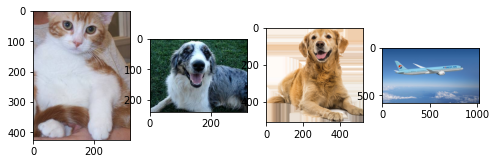

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

plt.subplot(1,4,1)
plt.imshow(dst_img1)
plt.subplot(1,4,2)
plt.imshow(dst_img2)
plt.subplot(1,4,3)
plt.imshow(dst_img3)
plt.subplot(1,4,4)
plt.imshow(dst_img4)

plt.tight_layout()
plt.show()

In [ ]:
import cv2

# 테스트 이미지 읽기
src_img1 = cv2.imread('./cat.9.jpg', cv2.IMREAD_COLOR)
src_img2 = cv2.imread('./dog.6331.jpg', cv2.IMREAD_COLOR)
src_img3 = cv2.imread('./dog.1.png', cv2.IMREAD_COLOR)
src_img4 = cv2.imread('./airplane1.jpg', cv2.IMREAD_COLOR)

# 채널순서 변경된 이미지
dst_img1 = cv2.cvtColor(src_img1, cv2.COLOR_BGR2RGB)
dst_img2 = cv2.cvtColor(src_img2, cv2.COLOR_BGR2RGB)
dst_img3 = cv2.cvtColor(src_img3, cv2.COLOR_BGR2RGB)
dst_img4 = cv2.cvtColor(src_img4, cv2.COLOR_BGR2RGB)

# 학습데이터 크기에 맞게 resize
dst_img1 = cv2.resize(dst_img1, dsize=(32,32))
dst_img2 = cv2.resize(dst_img2, dsize=(32,32))
dst_img3 = cv2.resize(dst_img3, dsize=(32,32))
dst_img4 = cv2.resize(dst_img4, dsize=(32,32))

# 정규화
src_img1 = src_img1 / 255.0
dst_img1 = dst_img1 / 255.0

src_img2 = src_img2 / 255.0
dst_img2 = dst_img2 / 255.0

src_img3 = src_img3 / 255.0
dst_img3 = dst_img3 / 255.0

src_img4 = src_img4 / 255.0
dst_img4 = dst_img4 / 255.0

print(src_img1.shape, dst_img1.shape)
print(src_img2.shape, dst_img2.shape)
print(src_img3.shape, dst_img3.shape)
print(src_img4.shape, dst_img4.shape)

(425, 320, 3) (32, 32, 3)
(240, 319, 3) (32, 32, 3)
(510, 525, 3) (32, 32, 3)
(576, 1024, 3) (32, 32, 3)


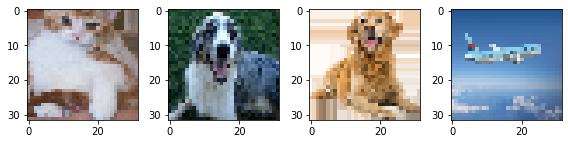

In [ ]:
# matplotlib 이용해서 이미지 출력

plt.figure(figsize=(8,8))

plt.subplot(1,4,1)
plt.imshow(dst_img1)
plt.subplot(1,4,2)
plt.imshow(dst_img2)
plt.subplot(1,4,3)
plt.imshow(dst_img3)
plt.subplot(1,4,4)
plt.imshow(dst_img4)

plt.tight_layout()
plt.show()

In [ ]:
# 예측

test_image_list = []

test_image_list.append(dst_img1)
test_image_list.append(dst_img2)
test_image_list.append(dst_img3)
test_image_list.append(dst_img4)

test_image_array = np.array(test_image_list)

print(test_image_array.shape)

(4, 32, 32, 3)


In [ ]:
# 이미지 예측을 위한 class name 정의

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
pred = cnn.predict(test_image_array)

print(pred.shape)

(4, 10)


In [ ]:
for index in range(len(pred)):

    class_index = np.argmax(pred[index])
    print('prediction => ',class_names[class_index], pred[index].max())

prediction =>  cat 0.38814583
prediction =>  dog 0.8797928
prediction =>  dog 0.49567956
prediction =>  airplane 0.9995177


In [ ]:
# 상위 3개 예측 값
top3 = 3

for index in range(len(pred)):

    sorted_index = pred[index].argsort()  # 오름차순으로 인덱스 정렬
    sorted_index = sorted_index[::-1]     # 내림차순으로 인덱스 정렬

    print('=====================================')
    print(sorted_index)
    
    for j in range(top3):
        pred_val = pred[index, sorted_index[j]]
        class_index = sorted_index[j]
        print('prediction => ',class_names[class_index], pred_val)
        

[3 4 5 2 7 0 6 9 8 1]
prediction =>  cat 0.38814583
prediction =>  deer 0.30882818
prediction =>  dog 0.12524822
[5 2 3 7 4 6 0 9 8 1]
prediction =>  dog 0.8797928
prediction =>  bird 0.05115063
prediction =>  cat 0.04861333
[5 3 6 4 2 7 9 1 0 8]
prediction =>  dog 0.49567956
prediction =>  cat 0.23136324
prediction =>  frog 0.09872584
[0 2 8 3 9 4 1 6 5 7]
prediction =>  airplane 0.9995177
prediction =>  bird 0.00029057026
prediction =>  ship 0.00019096285
